# Introduction to the Survival Analysis

This is a short introduction to how to use statistical methods with survival analysis.


## Methods


> **See Also**: For a more in-depth tour about statistical methods you can visit the following links:


## Data

- For this tutorial we will use two techniques to divide data into training and validation with TCGA data:
    - Bootstrap resampling
    - Cross validation
    -- k-folds
    -- Stratified k-folds
- The data we are going to use is right censored which means not all patients deceased

> For **python** libraries:
> - lifelines


In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

Load data from CSV file with 1083 breast cancer patients from TCGA

In [24]:
df = pd.read_csv('Dataset/BRCA_TCGA_Tutorial.csv')
df.head()

,ID,age,stage,aneuploidy_score,buffa_ hypoxia_score,cancer_type_detailed,Last Communication Contact from Initial Pathologic Diagnosis Date,Birth from Initial Pathologic Diagnosis Date,Disease Free (Months),Disease Free Status,...,T Cells CD4 Memory Resting,T Cells CD4 Naive,T Cells CD8,T Cells Follicular Helper,T Cells gamma delta,T Cells Regulatory Tregs,Lymphocytes,Mast Cells,Dendritic Cells,Macrophages
0,TCGA-A2-A0CO,85,STAGE IIB,8.0,-35.0,Breast Invasive Lobular Carcinoma,3409.0,-31404.0,NaN,NaN,...,0.228185,0.0,0.143303,0.116980,0.0,0.067530,0.717376,0.023990,0.000000,0.258634
1,TCGA-A2-A0CZ,46,STAGE IIA,NaN,-35.0,Breast Invasive Ductal Carcinoma,1616.0,-17026.0,NaN,NaN,...,0.104964,0.0,0.071310,0.040569,0.0,0.014379,0.392783,0.104896,0.000000,0.502320
2,TCGA-A7-A4SF,54,STAGE IIA,22.0,-5.0,Breast Invasive Ductal Carcinoma,545.0,-19985.0,NaN,NaN,...,0.120298,0.0,0.065040,0.061267,0.0,0.067571,0.519102,0.077403,0.000000,0.403495
3,TCGA-A8-A07R,80,STAGE IIIC,13.0,35.0,Breast Invasive Ductal Carcinoma,273.0,-29251.0,NaN,NaN,...,0.042369,0.0,0.036927,0.052592,0.0,0.039751,0.352028,0.002378,0.097752,0.529192
4,TCGA-A8-A07S,73,STAGE IIA,5.0,-25.0,Breast Invasive Carcinoma (NOS),243.0,-26998.0,NaN,NaN,...,0.100324,0.0,0.054141,0.062161,0.0,0.010230,0.275265,0.151477,0.003782,0.569475


In [25]:
# Look at the categorical and numerical variables
summary_categorical = []
for column in df.columns:
  if df[column].dtype == object:
    summary_categorical.append(column)
    print(df[column].value_counts())
    print(f"----------------------------------")

summary_numerical = []
for column in df.columns:
  if df[column].dtype != object:
    print(f"{column} : Minimum: {min((df[column].unique()))}, Maximum: {max((df[column].unique()))} ")
    summary_numerical.append(column)
    print(f"----------------------------------")

TCGA-A2-A0CO    1
TCGA-A7-A26J    1
TCGA-E9-A1RG    1
TCGA-LD-A66U    1
TCGA-A7-A4SE    1
               ..
TCGA-BH-A0BL    1
TCGA-A2-A0ER    1
TCGA-AC-A2FO    1
TCGA-BH-A0BZ    1
TCGA-B6-A0X0    1
Name: ID, Length: 1083, dtype: int64
----------------------------------
STAGE IIA     354
STAGE IIB     255
STAGE IIIA    155
STAGE I        89
STAGE IA       86
STAGE IIIC     64
STAGE IIIB     28
STAGE IV       19
STAGE X        14
STAGE II        6
STAGE IB        6
STAGE III       2
Name: stage, dtype: int64
----------------------------------
Breast Invasive Ductal Carcinoma            779
Breast Invasive Lobular Carcinoma           201
Breast Invasive Carcinoma (NOS)              77
Breast Invasive Mixed Mucinous Carcinoma     17
Metaplastic Breast Cancer                     8
Invasive Breast Carcinoma                     1
Name: cancer_type_detailed, dtype: int64
----------------------------------
0:DiseaseFree            858
1:Recurred/Progressed     84
Name: Disease Free Status, dtyp

In [22]:
# Convert all string categorical variables into integer labels
encoder = LabelEncoder()
for column in df.columns:
  if df[column].dtype == object:
    df[column] = encoder.fit_transform(df[column])

0       0
1       0
2       0
3       0
4       0
       ..
1078    0
1079    0
1080    0
1081    0
1082    2
Name: Disease-specific Survival status, Length: 1083, dtype: int64

# Kaplan-Meier Estimator

In [40]:
# here to specify which event we will make our study about OS or PFS etc.
event = 'OS'
time = 'OS Time'

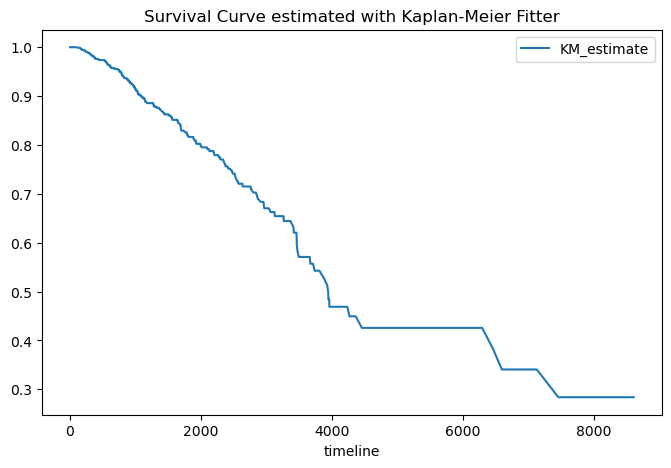

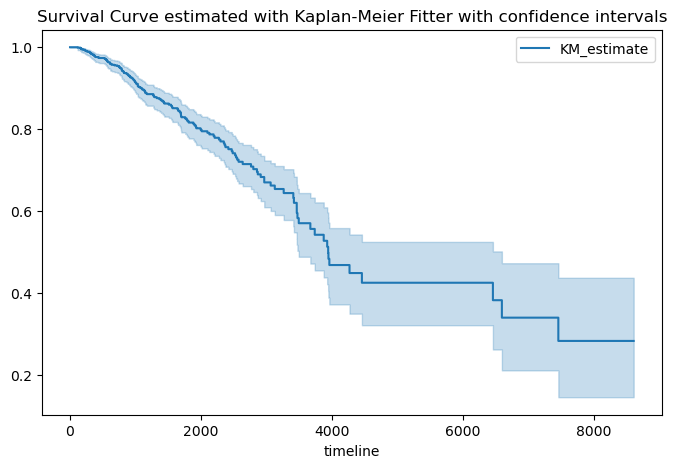

In [41]:
# remove the rows with NaNs
df_os = df.dropna(subset=[event, time])

from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(durations=df_os[time], event_observed=df_os[event])

kmf.survival_function_.plot(figsize=(8,5))
plt.title('Survival Curve estimated with Kaplan-Meier Fitter')
plt.show()

kmf.plot_survival_function(figsize=(8,5))
plt.title('Survival Curve estimated with Kaplan-Meier Fitter with confidence intervals')
plt.show()

In [38]:
# here is to show the KM estimated survival scores based on OS
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
1.0,1.000000
5.0,1.000000
7.0,1.000000
8.0,1.000000
...,...
7777.0,0.283785
8008.0,0.283785
8391.0,0.283785


# 1. Bootstrap Resampling

### 1.1 Basics of survival analysis

### 1.2 Kaplan-Meier

### 1.3 Log-Rank Test

### 1.4 Cox Regression

# Crossvalidation (K-Folds)

# Cross-validation (Stratified k-folds)